In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_data = np.arange(0, np.pi*2, 0.1)
correct_data = np.sin(input_data)
input_data = (input_data - np.pi) / np.pi
n_data = len(correct_data)

In [3]:
#입력,은닉,출력층
n_in = 1
n_mid =3
n_out = 1

In [4]:
wb_width = 0.01
eta = 0.1
epoch = 2001#바퀴돈다
interval =200#돌때마다출력을 나차내려고

In [5]:
#은닉설계
class MiddleLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)#행렬이 n개인
        self.b = wb_width * np.random.randn(n)
        
    def forward(self,x):#입력이 들어오면 내부 변수에 저장
        self.x =x
        u = np.dot(x, self.w) + self.b #출력u구상
        self.y = 1/ (1 + np.exp(-u))# 활성함수 시그모이드 구상
        
    def backward(self, grad_y):
        delta = grad_y * (1-self.y) * self.y #시그모이드 함수 미분
        self.grad_w = np.dot(self.x.T, delta)
        self.gårad_b = np.sum(delta, axis=0)
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta):#가중치 업데이트
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

In [6]:
class OutputLayer: #출력레이어 설계
    def __init__(self,n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)#행렬이 n개인
        self.b = wb_width * np.random.randn(n)
        
    def forward(self, x):
        self.x =x
        u = np.dot(x, self.w) + self.b #출력u구상
        self.y = u #항등함수 넣어줌
        
    def backward(self, t): #출력에 타깃이 들어옴
        delta = self.y - t
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta):#가중치 업데이트
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

In [7]:
#클래스로 객체 생성
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

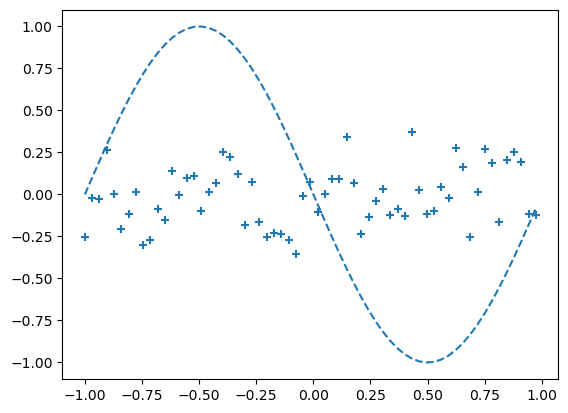

Epoch:0/2001 Error:0.2824878043238508


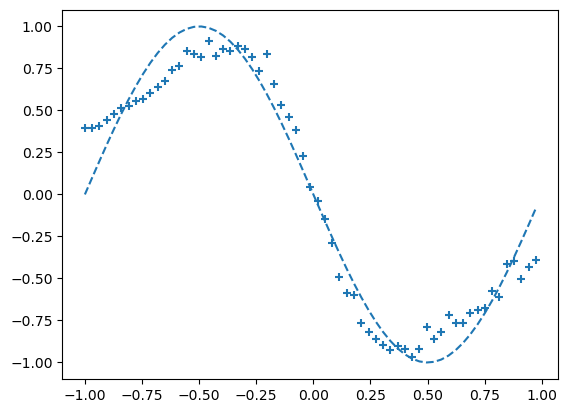

Epoch:200/2001 Error:0.010706269022773727


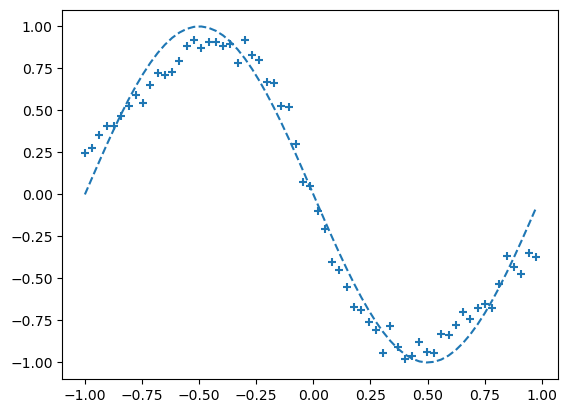

Epoch:400/2001 Error:0.006917330586679007


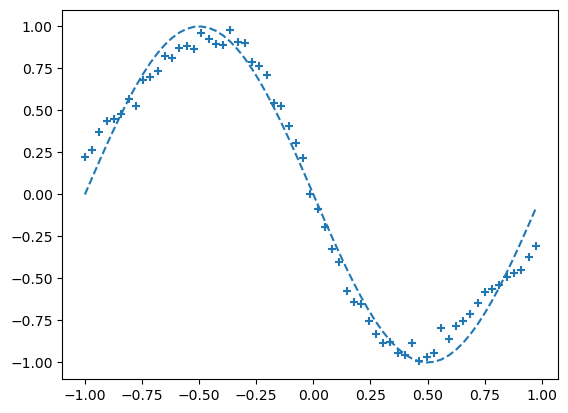

Epoch:600/2001 Error:0.004969202028995364


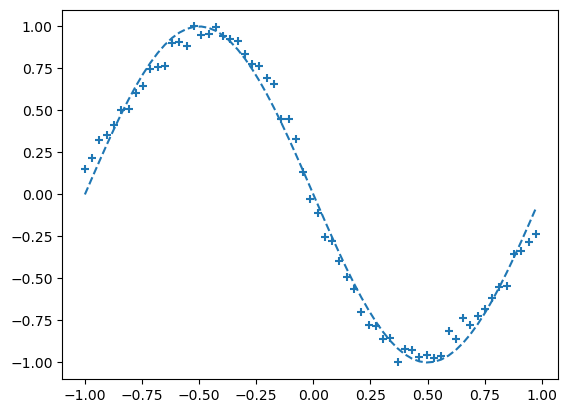

Epoch:800/2001 Error:0.002594996031890932


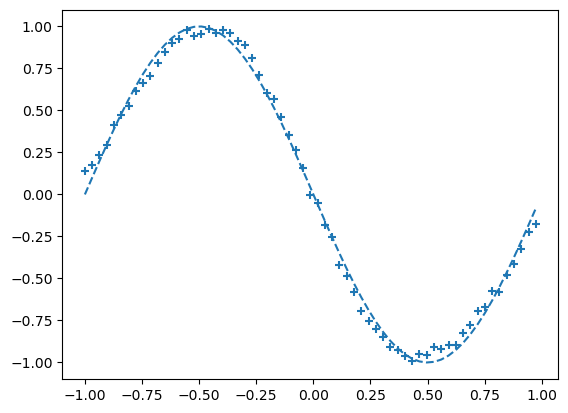

Epoch:1000/2001 Error:0.0012146049181887672


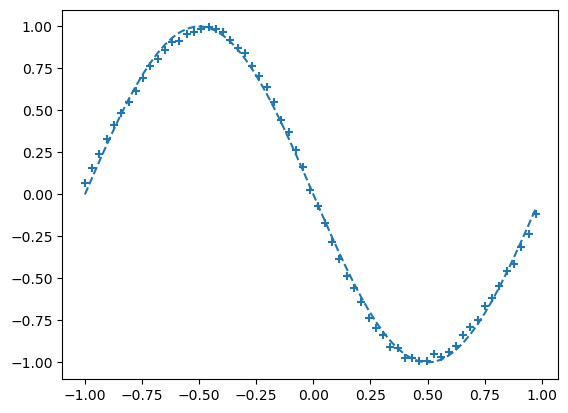

Epoch:1200/2001 Error:0.00046203269499577466


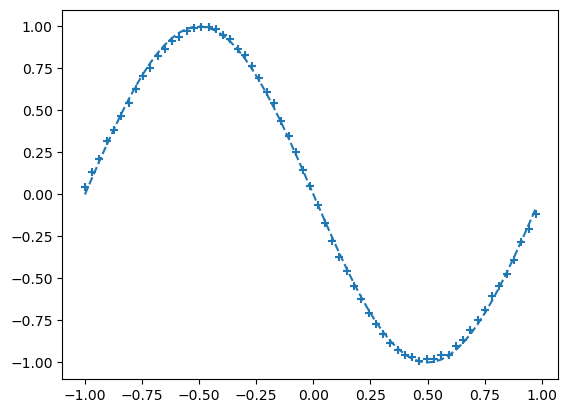

Epoch:1400/2001 Error:0.00016135678132981772


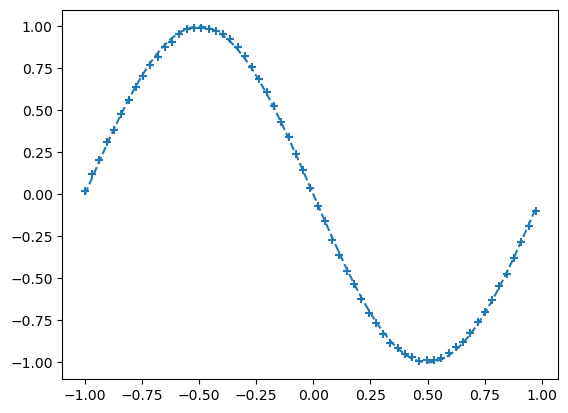

Epoch:1600/2001 Error:5.7653609472150325e-05


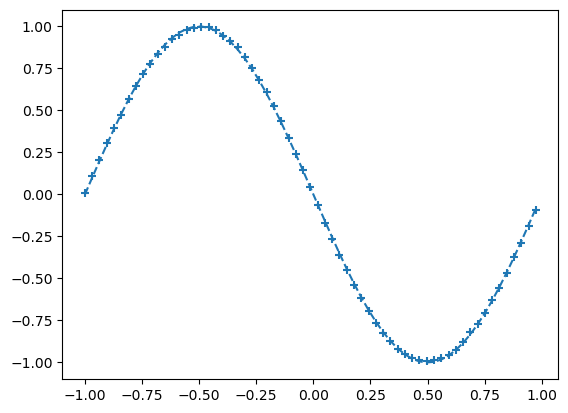

Epoch:1800/2001 Error:2.352602099138182e-05


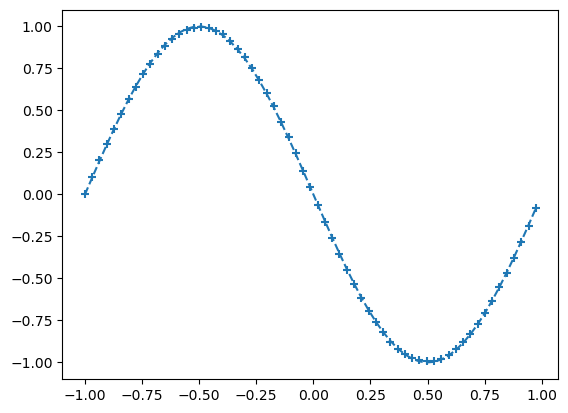

Epoch:2000/2001 Error:1.2421768114351141e-05


In [8]:
for i in range(epoch):
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    total_error = 0
    plot_x = []
    plot_y = []
    
    for idx in index_random:
        x = input_data[idx:idx+1]#x값 하나만 가져옴
        t = correct_data[idx:idx+1]#타깃 정답
        
        middle_layer.forward(x.reshape(1,1))
        output_layer.forward(middle_layer.y)
        
        #역전파
        output_layer.backward(t.reshape(1,1))
        middle_layer.backward(output_layer.grad_x)
        
        #가중치
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i % interval == 0:
            y = output_layer.y.reshape(-1)#-1은행렬을 1차원으로 바꾼다
            
            total_error += 1.0 / 2.0 *np.sum(np.square(y - t))
            
            plot_x.append(x)
            plot_y.append(y)#인터벌마다 기록
            
    if i % interval == 0:
        plt.plot(input_data, correct_data, linestyle='dashed')
        plt.scatter(plot_x, plot_y, marker='+')
        plt.show()
        
        print("Epoch:" + str(i) + '/' + str(epoch),
              "Error:" + str(total_error / n_data))
                             